In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [17]:
num_frames = 100
timestep = 0.05
# timestep = 1
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]
r_vals[0] = 1e-10
M_vals = np.linspace(0, 25.0, len(r_vals))
M_vals[0] = 1e-10
print(f"shape of r_vals : {r_vals.shape}")
print(f"shape of M_vals : {M_vals.shape}")

shape of r_vals : (500,)
shape of M_vals : (500,)


In [18]:
# load the data from G_pred.txt
# the data is of shape (time_frames, r_vals.shape[0])
G_pred = np.loadtxt("G_pred_test.txt")
print(f"shape of G_pred : {G_pred.shape}")

############### check this step ################
G_pred = G_pred * 2 * np.pi * r_vals
############### check this step ################

# apply the fft to the data on r axis to get K(w, r)
K = fft.fft(G_pred, axis=0)
print(f"shape of K : {K.shape}")
np.savetxt("K.txt", K)

# get omega values
omega_vals = fft.fftfreq(K.shape[0], d=timestep)
print(f"shape of omega_vals : {omega_vals.shape}")
print(f"omega_vals : {omega_vals}")

# access real and imaginary parts of K
K_real = np.real(K)
K_imag = np.imag(K)
print(f"shape of K_real : {K_real.shape}")
print(f"shape of K_imag : {K_imag.shape}")



shape of G_pred : (100, 500)
shape of K : (100, 500)
shape of omega_vals : (100,)
omega_vals : [  0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8   2.    2.2
   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2   4.4   4.6
   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6   6.8   7.
   7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.    9.2   9.4
   9.6   9.8 -10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2
  -8.   -7.8  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8
  -5.6  -5.4  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4
  -3.2  -3.   -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.
  -0.8  -0.6  -0.4  -0.2]
shape of K_real : (100, 500)
shape of K_imag : (100, 500)


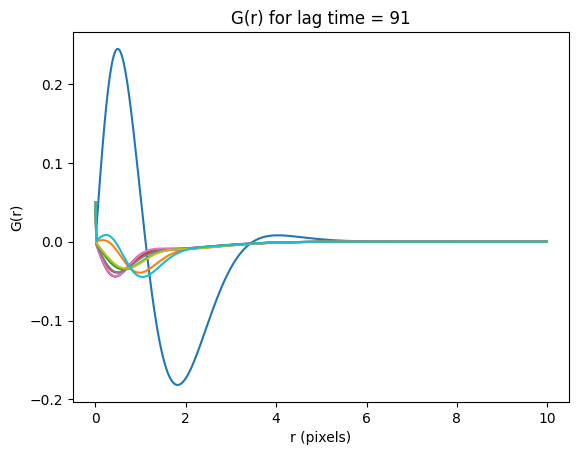

In [19]:
# visualise the real part of S(k, w)
########### IMPLEMENT THIS ##############
# visualise the real part of G_pred_freq
num_freqs = K_real.shape[0]
for i in range(1, num_frames, 10):
    plt.plot(r_vals, K_real[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G(r)")
    plt.title(f"G(r) for lag time = {i}")
plt.show()

In [20]:
num_alphas = 10
alphlowlim = 0.0
alphhighlim = 0.9
num_ds = 50
dlowlim = 0.0
dhighlim = 4.9

In [21]:
alpha_vals = np.linspace(alphlowlim, alphhighlim, num_alphas)
print(alpha_vals)
alpha_vals[0] = 1e-10 # set alpha=0 to a small value
d_vals = np.linspace(dlowlim, dhighlim, num_ds)
print(d_vals)
d_vals[0] = 1e-10 # set d=0 to a small value

# print the shape of the data
print(f"shape of alpha_vals : {alpha_vals.shape}")
print(f"shape of d_vals : {d_vals.shape}")
print(f"shape of omega_vals : {omega_vals.shape}")
# print(omega_vals)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
shape of alpha_vals : (10,)
shape of d_vals : (50,)
shape of omega_vals : (100,)


In [22]:
def calc_Z(alpha_vals, d_vals, num_frames, r_vals):
    Z = np.ones((alpha_vals.shape[0], d_vals.shape[0], num_frames, r_vals.shape[0]))
    t_vals = np.linspace(0.0, 4.95, num_frames)
    # t_vals = np.linspace(0.0, 99, num_frames)
    t_vals[0] = 1e-10 # avoid division by zero
    for i in range(alpha_vals.shape[0]):
        for j in range(d_vals.shape[0]):
            for k in range(r_vals.shape[0]):
                # calculate exp(-r^2/(D*t^alpha)) for each t and perform fft and take real part
                # Z[i, j, k, :] = fft.fft(np.exp(-(r_vals[k]**2)/(d_vals[j]*t_vals**alpha_vals[i]))).real
                Z[i, j, :, k] = fft.fft(np.exp(-(r_vals[k]**2)/(2*d_vals[j]*(t_vals**alpha_vals[i])))).real

    print("Z.shape = {}".format(Z.shape))
    return Z

In [23]:
Z = calc_Z(alpha_vals, d_vals, num_frames, r_vals)
# make small values of Z to be zero
# Z[np.abs(Z) < 1e-10] = 0.0
# print(Z)

# save Z
# np.save('Z.npy', Z)

Z.shape = (10, 50, 100, 500)


In [24]:
# initialize P_alpha_d
# P_alpha_d = np.ones((K_real.shape[0], num_alphas, num_ds))
P_alpha_d = np.zeros((K_real.shape[0], num_alphas, num_ds))


P_alpha_d[:, 1, 20] = 1

# P_alpha_d = np.ones((num_alphas, num_ds))
print(f"shape of P_alpha_d : {P_alpha_d.shape}")

P_alpha_d_old = P_alpha_d.copy()
# 

shape of P_alpha_d : (100, 10, 50)


$P_w^{k+1}(\alpha, D) = P_w^k(\alpha, D) \int \frac{K(\omega, r)}{K_{pred}(\omega, r)}Z(\alpha, D, \omega, r) dr$

where

$K_{pred}(\omega, r) = \int \int P_w^k(\alpha, D) Z(\alpha, D, \omega, r)d\alpha dD$

In [25]:
K_pred = np.zeros(K_real.shape)
print(K_pred.shape)

(100, 500)


In [26]:
def integ1(K_pred, P_alpha_d, alpha_vals, d_vals, r_vals, omega_vals):
    # implement the integral in the equation 2
    # $K_{pred}(\omega, r) = \int \int P^k(\alpha, D) Z(\alpha, D, r, \omega)d\alpha dD$

    # the integral is implemented by the trapezoidal rule
    for i in range(K_pred.shape[0]):
        for j in range(K_pred.shape[1]):
            # K_pred[i, j] = np.trapz(np.trapz(P_alpha_d * Z(alpha_vals, d_vals, omega_vals[i], r_vals[j]), d_vals), alpha_vals)
            K_pred[i, j] = np.trapz(np.trapz(P_alpha_d[i] * Z[:, :, i, j], d_vals), alpha_vals)
            # temp = np.trapz(P_alpha_d[i] * Z[:, :, j, i], d_vals)
            # # print(temp.shape)
            # K_pred[i, j] = np.trapz(temp, alpha_vals)

    # normalize K_pred by dividing each element by the sum of its row + 1
    # K_pred = K_pred / (np.sum(K_pred, axis=1)[:, np.newaxis] + 1)
    K_pred = K_pred / (np.sum(K_pred, axis=1) + 1).reshape(-1, 1)

    # # print all rows of k_pred
    # for i in range(K_pred.shape[0]):
    #     print(K_pred[i, :])

    return K_pred

def integ2(K_real, K_pred, P_alpha_d, alpha_vals, d_vals, r_vals, omega_vals):
    # implement the integral in the equation 1
    # $P^{k+1}(\alpha, D) = P^k(\alpha, D) \int \int \frac{K(\omega, r)}{K_{pred}(\omega, r)}Z(\alpha, D, r, \omega) dw dr$

    # save K_real to a file
    # np.savetxt("K_real.txt", K_real)

    K_pred[K_pred < 1e-7] = 0.0

    # the integral is implemented by the trapezoidal rule

    # get ratio as K_real / K_pred, but if K_pred is 0, set ratio to 1
    ratio = np.divide(K_real, K_pred, out=np.ones_like(K_real), where=K_pred != 0)
    # print(ratio.shape)
    print(f"mean ratio : {np.mean(ratio)}")
    
    #################################
    # ratio = np.ones_like(K_real)
    #################################
    # copy = P_alpha_d.copy()

    for i in range( P_alpha_d.shape[0]):
        for j in range(P_alpha_d.shape[1]):
            for k in range(P_alpha_d.shape[2]):

                
                # P_alpha_d[j, k] *= np.trapz(np.trapz(ratio * Z[j, k, :, :], r_vals), omega_vals)

                P_alpha_d[i, j, k] *= np.trapz(ratio[i] * Z[j, k, i, :], r_vals)


    # normalize P_alpha_d by dividing each element by the sum of its 1st and 2nd dimension + 1
    # P_alpha_d = P_alpha_d / (np.sum(P_alpha_d, axis=(1, 2))[:, np.newaxis, np.newaxis] + 1)
    P_alpha_d = P_alpha_d / (np.sum(P_alpha_d, axis=(1, 2)) + 1).reshape(-1, 1, 1)
    # P_alpha_d = P_alpha_d / (np.sum(P_alpha_d) + 1)
    # print the difference between P_alpha_d and copy
    # print(np.sum(np.abs(P_alpha_d - copy)))
    return P_alpha_d    

In [27]:
# iterate until delta is small enough
delta = 10000
num_iter = 0
# temp = np.ones_like(K_pred)
# while delta > 1e-3 and num_iter < 1:
while delta > 1e-7:
    K_pred = integ1(K_pred, P_alpha_d, alpha_vals, d_vals, r_vals, omega_vals)
    P_alpha_d = integ2(K_real, K_pred, P_alpha_d, alpha_vals, d_vals, r_vals, omega_vals)
    delta = np.sum((P_alpha_d - P_alpha_d_old)**2)
    print(f"delta : {delta}")
    P_alpha_d_old = P_alpha_d.copy()
    num_iter += 1
print(f"num_iter : {num_iter}")

mean ratio : 3.4063663557754347
delta : 2965.851284739774
mean ratio : 0.41630141053392844
delta : 3032.7989758566237
mean ratio : 3.8169476830012776
delta : 9161.289017499474
mean ratio : 0.8876888710631564
delta : 9116.466992738155
mean ratio : 3.426240022024234
delta : 6626.161565287764
mean ratio : 0.5079106257151876
delta : 6590.605571646332
mean ratio : 3.186521455411979
delta : 47732.82578547694
mean ratio : 0.7910111117358727
delta : 48108.47962328242
mean ratio : 4.182684208064674
delta : 5852.345370083149
mean ratio : 0.29237871769350093
delta : 5852.56247401855
mean ratio : 3.191076210107217
delta : 6480.800700464511
mean ratio : 1.115873784771203
delta : 6466.888593418981
mean ratio : 3.4183296170629243
delta : 5998.160775976398
mean ratio : 0.27109814473653326
delta : 5997.475532462516
mean ratio : 4.250740809959254
delta : 16836.864586827476
mean ratio : 0.8496877269053188
delta : 17031.889666951327
mean ratio : 3.4094997894845513
delta : 6168.495276895894
mean ratio : 0.

KeyboardInterrupt: 

In [ ]:
# print all rows of k_real
for i in range(K_real.shape[0]):
    print(K_real[i, :])

[5.01002007e-02 8.39352977e-02 1.67736715e-01 2.51270999e-01
 3.34406152e-01 4.17012034e-01 4.98960965e-01 5.80128284e-01
 6.60392896e-01 7.39637776e-01 8.17750433e-01 8.94623343e-01
 9.70154325e-01 1.04424687e+00 1.11681045e+00 1.18776070e+00
 1.25701965e+00 1.32451585e+00 1.39018441e+00 1.45396707e+00
 1.51581219e+00 1.57567466e+00 1.63351579e+00 1.68930324e+00
 1.74301075e+00 1.79461800e+00 1.84411035e+00 1.89147858e+00
 1.93671864e+00 1.97983131e+00 2.02082194e+00 2.05970013e+00
 2.09647940e+00 2.13117690e+00 2.16381306e+00 2.19441135e+00
 2.22299792e+00 2.24960134e+00 2.27425232e+00 2.29698346e+00
 2.31782901e+00 2.33682459e+00 2.35400707e+00 2.36941426e+00
 2.38308484e+00 2.39505811e+00 2.40537388e+00 2.41407237e+00
 2.42119401e+00 2.42677943e+00 2.43086928e+00 2.43350424e+00
 2.43472488e+00 2.43457164e+00 2.43308475e+00 2.43030424e+00
 2.42626986e+00 2.42102106e+00 2.41459696e+00 2.40703636e+00
 2.39837768e+00 2.38865899e+00 2.37791794e+00 2.36619182e+00
 2.35351749e+00 2.339931

In [ ]:
def contour_plt(P_alpha_d, i=0):
    """
    Visualise P_alpha_d[0] as a countour plot using contourf
    """
    # plot
    # rescale the y axis to be in the range of 0 to 2
    # rescale the x axis to be in the range of 0 to 1000
    plt.figure(figsize=(5, 5))
    x = np.linspace(dlowlim, dhighlim, num_ds)
    y = np.linspace(alphlowlim, alphhighlim, num_alphas)
    plt.contourf(x, y, P_alpha_d[i], 20, cmap='RdGy')
    plt.xlabel('d')
    plt.ylabel('alpha')
    plt.colorbar()
    plt.show()

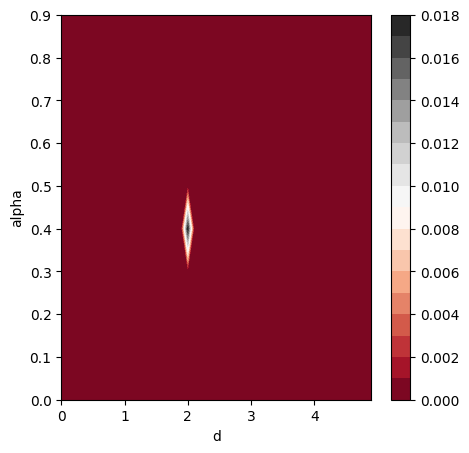

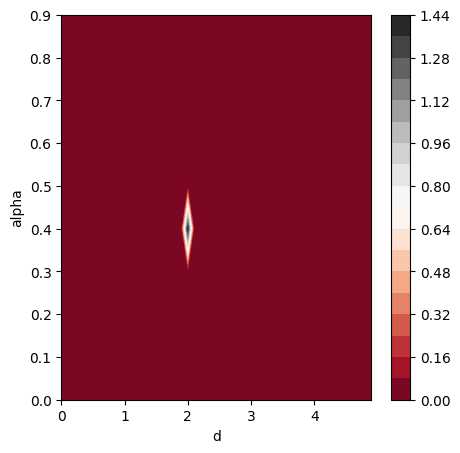

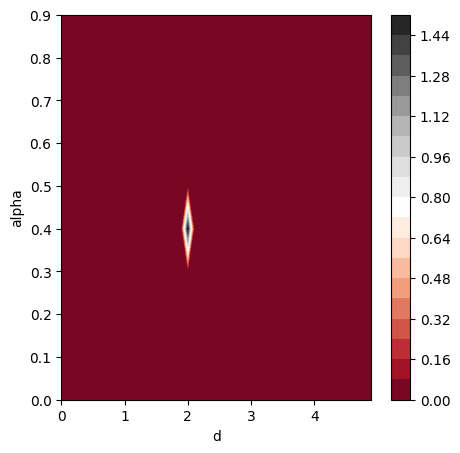

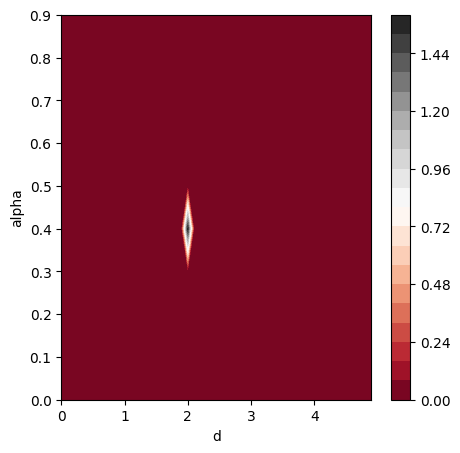

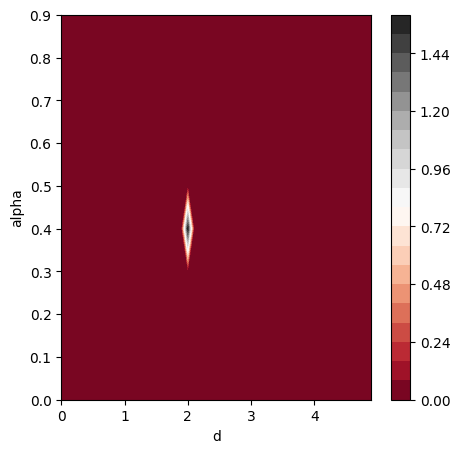

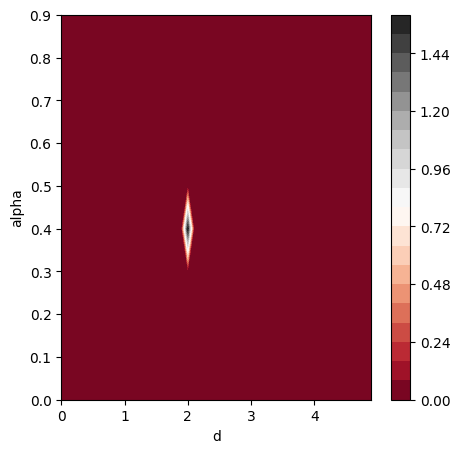

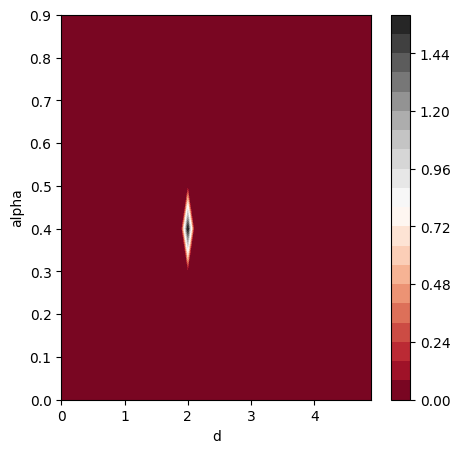

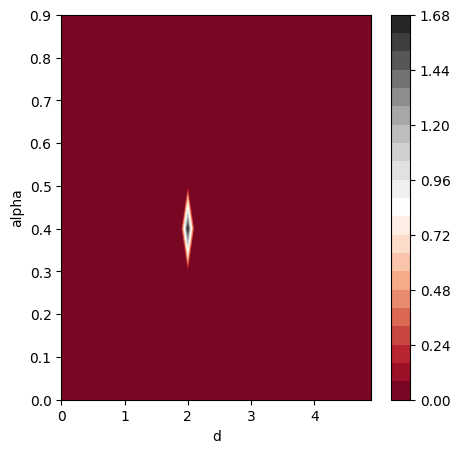

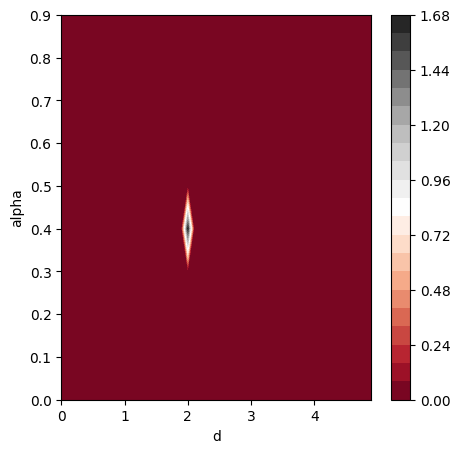

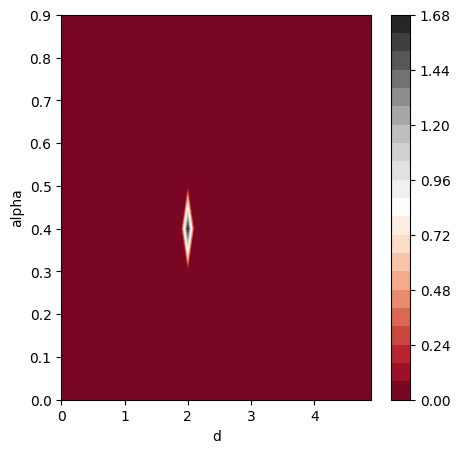

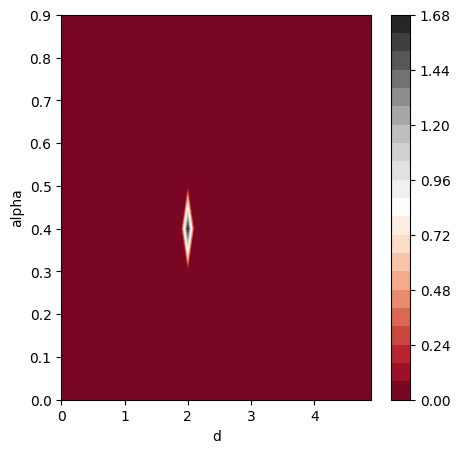

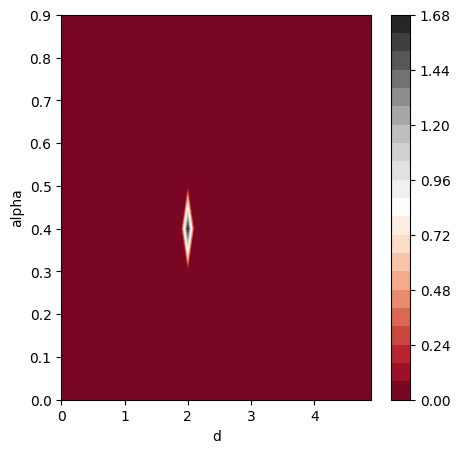

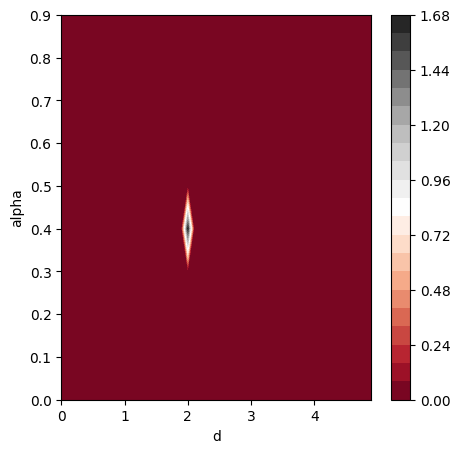

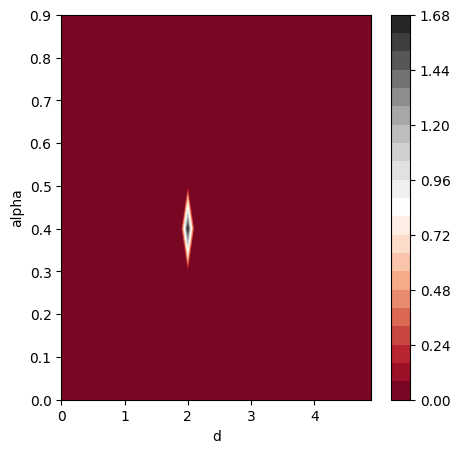

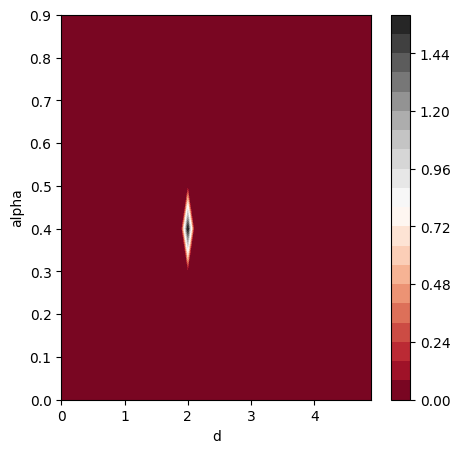

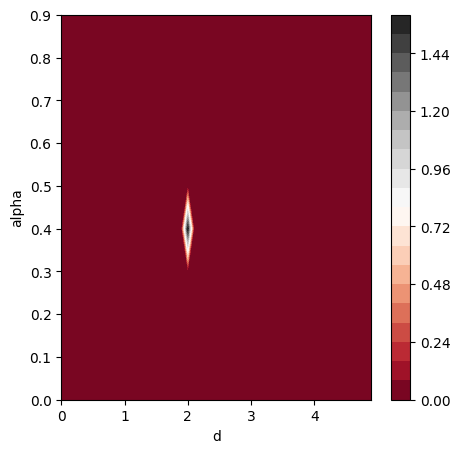

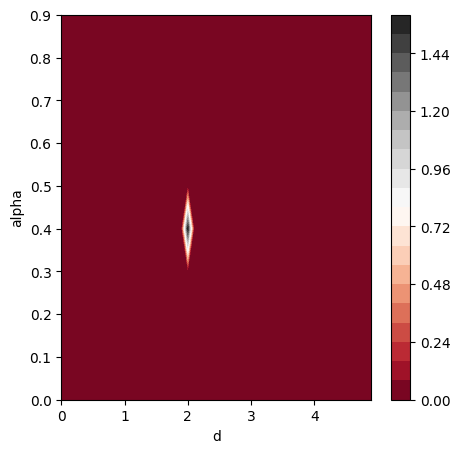

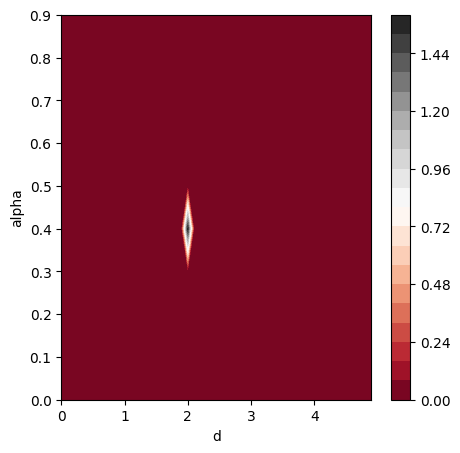

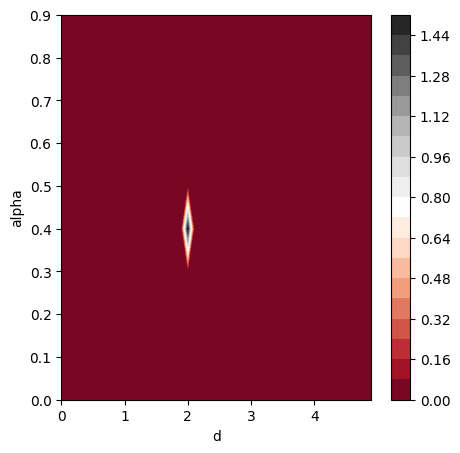

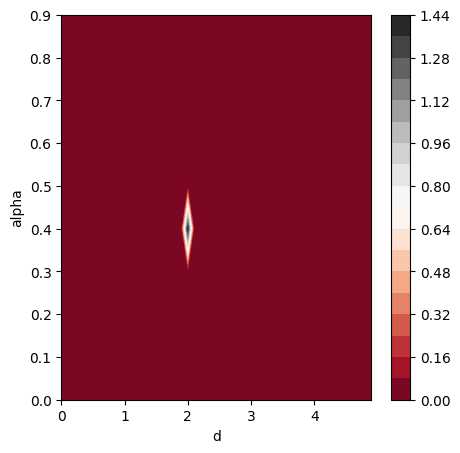

In [ ]:
for i in range(0, len(P_alpha_d), 5):
    contour_plt(P_alpha_d, i)